In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack

## For un-successful installtion by using pip
1. Download the package in .whl file
2. Unzip the file and move it to where you store python library
3. Use !pip install "C:/Users/rex/Anaconda3/Lib/site-packages/wordcloud-1.4.1-cp36-cp36m-win_amd64.whl" to install the package

In [2]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train = pd.read_csv('train.csv').fillna(' ')
test = pd.read_csv('test.csv').fillna(' ')

In [25]:
train = train[:7000]
test = test[:7000]

In [26]:
train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean_Text
6995,12a3ddf499b8e3b0,"And this is off the track, but if you continue...",0,0,0,0,0,0,And this is off the track but if you continue ...
6996,12a3fef786aa2aef,definition 1: sheldon the aids smoking ninja r...,1,0,0,0,0,0,definition sheldon the aids smoking ninja rapist
6997,12a3ffa8215af086,"I was in central London at the time, it was to...",0,0,0,0,0,0,I was in central London at the time it was tot...
6998,12a4e80cdf743b3a,"Exactly, what are the jobs did the two produce...",0,0,0,0,0,0,Exactly what are the jobs did the two producer...
6999,12a54db2229184b3,u suck at making movies\n\nu pathetic geek\n\n...,1,0,1,0,1,0,u suck at making movies u pathetic geek ur pre...


In [27]:
train["comment_text"][-5:].str.replace("\n", " ")

6995    And this is off the track, but if you continue...
6996    definition 1: sheldon the aids smoking ninja r...
6997    I was in central London at the time, it was to...
6998    Exactly, what are the jobs did the two produce...
6999    u suck at making movies  u pathetic geek  ur p...
Name: comment_text, dtype: object

In [6]:
import re
re.sub(' +',' ',(train["comment_text"][3]))

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents"" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport "'

In [7]:
re.sub('[^A-Za-z]+', ' ', train["comment_text"][3].replace("'","").replace("\n", " "))

' More I cant make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up Its listed in the relevant form eg Wikipedia Good article nominations Transport '

## Text Pre-processing
1. Replace "can't" to  "cant"
2. Replace "\n" to " ", i.e. "\nTedious\nPre-processing" to "Tedious Pre-processing"
3. Remove all numeric and special character

In [28]:
import re
Text_only= []
Clean_train= []
for i in range(test.shape[0]):
    Text=re.sub('[^A-Za-z]+', ' ', (train["comment_text"][i].replace("'","").replace("\n", " ")))
    Text_only.append(Text)
    Clean=re.sub(' +',' ',Text)
    Clean_train.append(Clean)

In [29]:
Text_only= []
Clean_test= []
for i in range(test.shape[0]):
    Text=re.sub('[^A-Za-z]+', ' ', (test["comment_text"][i].replace("'","").replace("\n", " ")))
    Text_only.append(Text)
    Clean=re.sub(' +',' ',Text)
    Clean_test.append(Clean)

In [32]:
train['Clean_Text'] = pd.DataFrame(Clean_train)
test['Clean_Text'] = pd.DataFrame(Clean_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Stemming and Lemmatization
After removal of stopwords, the next stage of NLP that I would like to introduce is the process of Stemming. The work at this stage attempts to reduce as many different variations of similar words into a single term ( different branches all reduced to single word stem). Therefore if we have "running", "runs" and "run", you would really want these three distinct words to collapse into just the word "run". (However of course you lose granularity of the past, present or future tense).

However there is one flaw with stemming and that is the fact that the process involves quite a crude heuristic in chopping off the ends of words in the hope of reducing a particular word into a human recognizable base form. Therefore this process does not take into account vocabulary or word forms

Therefore we turn to another that we could use in lieu of stemming. This method is called lemmatization which aims to achieve the same effect as the former method. However unlike a stemmer, lemmatizing the dataset aims to reduce words based on an actual dictionary or vocabulary (the Lemma) and therefore will not chop off words into stemmed forms that do not carry any lexical meaning.

In [10]:
import nltk

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MingChoon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [33]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

train['text_lemmatized'] = train["Clean_Text"].apply(lemmatize_text)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [34]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

test['text_lemmatized'] = test["Clean_Text"].apply(lemmatize_text)

In [35]:
train_lemmatized=[]
for i in range(train.shape[0]):
    t=' '.join(word for word in train['text_lemmatized'][i])
    train_lemmatized.append(t)

In [36]:
test_lemmatized=[]
for i in range(test.shape[0]):
    t=' '.join(word for word in test['text_lemmatized'][i])
    test_lemmatized.append(t)

In [37]:
train["text_lemmatized"]=pd.DataFrame({'comment_text':train_lemmatized})
test["text_lemmatized"]=pd.DataFrame({'comment_text':test_lemmatized})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
train["Clean_Text"][1]

'Daww He matches this background colour Im seemingly stuck with Thanks talk January UTC '

In [39]:
train["text_lemmatized"][1]

'Daww He match this background colour Im seemingly stuck with Thanks talk January UTC'

In [40]:
Clean_test[-3]

' Trivia section Per WP AVTRIV I propose that we delete the trivia section or severely pare it down '

In [12]:
test.shape

(153164, 2)

In [41]:
Clean_train=pd.DataFrame({'comment_text':Clean_train})
Clean_test=pd.DataFrame({'comment_text':Clean_test})

In [42]:
train["Clean_Text"]=Clean_train
test["Clean_Text"]=Clean_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
train["Clean_Text"].fillna("unknown", inplace=True)
test["Clean_Text"].fillna("unknown", inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
test= test[:5000]

In [47]:
columns = ['id', 'comment_text',"Clean_Text"]
train.drop(columns,axis=1).sum()

toxic                                                            701
severe_toxic                                                      72
obscene                                                          381
threat                                                            26
insult                                                           359
identity_hate                                                     63
text_lemmatized    Explanation Why the edits made under my userna...
dtype: object

In [44]:
Non_toxic=train[(train['toxic']==0) & (train['severe_toxic']==0)\
      & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) \
     & (train['identity_hate']==0)]

In [45]:
Non_toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean_Text,text_lemmatized
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...,Explanation Why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,Daww He matches this background colour Im seem...,Daww He match this background colour Im seemin...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man Im really not trying to edit war Its j...,Hey man Im really not trying to edit war Its j...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I cant make any real suggestions on impr...,More I cant make any real suggestion on improv...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember wh...,You sir are my hero Any chance you remember wh...


In [48]:
Non_toxic.drop(columns,axis=1).count()

toxic              6254
severe_toxic       6254
obscene            6254
threat             6254
insult             6254
identity_hate      6254
text_lemmatized    6254
dtype: int64

In [49]:
Toxic=train[(train['toxic']==1) | (train['severe_toxic']==1)\
      | (train['obscene']==1) | (train['threat']==1) | (train['insult']==1) \
     | (train['identity_hate']==1)]

In [50]:
Toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean_Text,text_lemmatized
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,Hey what is it talk What is it an exclusive gr...,Hey what is it talk What is it an exclusive gr...
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,Bye Dont look come or think of comming back To...,Bye Dont look come or think of comming back To...
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,You are gay or antisemmitian Archangel WHite T...,You are gay or antisemmitian Archangel WHite T...
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,FUCK YOUR FILTHY MOTHER IN THE ASS DRY,FUCK YOUR FILTHY MOTHER IN THE ASS DRY


In [51]:
Toxic.drop(["id", "comment_text","Clean_Text"],axis=1).sum()

toxic                                                            701
severe_toxic                                                      72
obscene                                                          381
threat                                                            26
insult                                                           359
identity_hate                                                     63
text_lemmatized    COCKSUCKER BEFORE YOU PISS AROUND ON MY WORKHe...
dtype: object

## Word Cloud

In [17]:
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in train.drop(["id", "comment_text","Clean_Text","toxic"],axis=1):
    confusion_matrix = pd.crosstab(train[main_col], train[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=train.drop(["id", "comment_text","Clean_Text","toxic"],axis=1))

out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  144277     0  143754   523  144248   29  143744   533   
1                   13699  1595    7368  7926   14845  449    7950  7344   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   144174   103  
1                    13992  1302

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [57]:
cloud=WordCloud(stopwords=STOPWORDS,background_color='white',width=4500,height=4000).generate(' '.join(Non_toxic["Clean_Text"]))

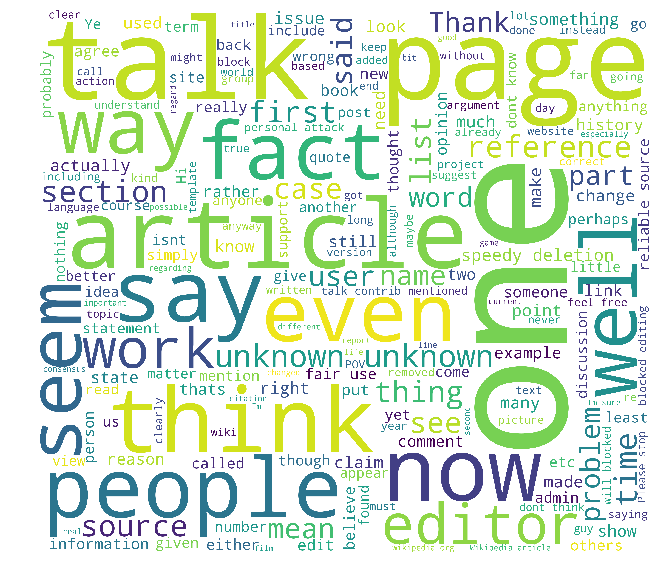

In [61]:
plt.subplots(figsize=(10,10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [66]:
cloud=WordCloud(stopwords=STOPWORDS,background_color='white',width=1500,height=1000).generate(' '.join(Toxic["Clean_Text"]))

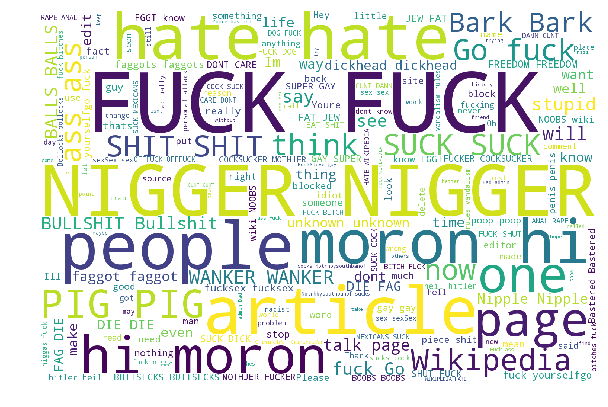

In [67]:
plt.subplots(figsize=(10,10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [25]:
Toxic.shape

(16225, 9)

In [26]:
Sample=Toxic[:10000].append(Non_toxic[:4000])

In [27]:
Sample.shape

(14000, 9)

In [52]:
#train_text = train['comment_text']
train_text = train['text_lemmatized']
test_text = test['text_lemmatized']
all_text = pd.concat([train_text, test_text])

In [53]:
len(all_text)

14000

In [54]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

In [55]:
len(word_vectorizer.get_feature_names())

10000

In [56]:
word_vectorizer.get_feature_names()[:5]

['aa', 'aafco', 'aaron', 'abbey', 'abbreviation']

In [57]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    stop_words='english',
    ngram_range=(2,3),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

In [58]:
char_vectorizer.get_feature_names()[:5]

['aaaaaaaaa jpg',
 'aafco certified',
 'aaghiren naan',
 'aaron johnston',
 'aaron swartz']

In [59]:
feature_name=char_vectorizer.get_feature_names() + word_vectorizer.get_feature_names()

In [60]:
train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features])

In [61]:
# Only test for word
feature_name=word_vectorizer.get_feature_names()
train_features = train_word_features
test_features = test_word_features

In [62]:
# Only test for word combination
feature_name=char_vectorizer.get_feature_names()
train_features = train_char_features
test_features = test_char_features

In [63]:
submission = pd.DataFrame.from_dict({'id': test['id']})
submission.head()

,id
0,00001cee341fdb12
1,0000247867823ef7
2,00013b17ad220c46
3,00017563c3f7919a
4,00017695ad8997eb


In [85]:
scores = []
coef = []
submission = pd.DataFrame.from_dict({'id': test['id']})
pred = pd.DataFrame.from_dict({'id': test['id']})
for class_name in class_names:
    train_target = train[class_name]
    classifier = LogisticRegression(C=0.1, solver='sag')

    cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=3, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    classifier.fit(train_features, train_target)
    c = classifier.coef_
    coef.append(c)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]
    pred[class_name] = classifier.predict(test_features)

print('Total CV score is {}'.format(np.mean(scores)))


CV score for class toxic is 0.7541218626481211
CV score for class severe_toxic is 0.8058609200337221
CV score for class obscene is 0.7769761394151246
CV score for class threat is 0.6712894601961352
CV score for class insult is 0.7916402012165819
CV score for class identity_hate is 0.6946960930468844
Total CV score is 0.7490974460927614


In [68]:
LogisticRegression?

In [ ]:
pred.sort_values('id').head()

In [ ]:
test.drop('comment_text',axis=1).sort_values('id').head()

In [190]:
pred.drop("id",axis=1).sum()

toxic            13612
severe_toxic       547
obscene           7498
threat               0
insult            5295
identity_hate      133
dtype: int64

In [ ]:
classifier

In [191]:
submission.to_csv('submission.csv', index=False)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(Sample.drop(['id','comment_text'],axis=1), pred.drop('id',axis=1))
df = pd.DataFrame(confusion, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(test, 
                                                                       pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

NameError: name 'Sample' is not defined

In [86]:
coef

[array([[ 0.        ,  0.        ,  0.        , ..., -0.00133349,
          0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.        , ..., -0.00014087,
          0.        ,  0.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.01293528, 0.        ,
         0.        ]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -5.13007072e-05,  0.00000000e+00,  0.00000000e+00]]),
 array([[0.        , 0.        , 0.        , ..., 0.01298338, 0.        ,
         0.        ]]),
 array([[ 0.        ,  0.        ,  0.        , ..., -0.00012279,
          0.        ,  0.        ]])]

In [87]:
coef=np.concatenate( coef, axis=0 )

In [88]:
coef

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33348987e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.40871983e-04,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.29352782e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.13007072e-05,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.29833825e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.22794789e-04,  0.00000000e+00,  0.00000000e+00]])

In [76]:
train.drop(columns,axis=1).columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'text_lemmatized'],
      dtype='object')

In [ ]:
pd.unique

In [69]:
target=train.drop(columns,axis=1).columns

In [70]:
target

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'text_lemmatized'],
      dtype='object')

In [71]:
train_features

<7000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 85963 stored elements in Compressed Sparse Row format>

In [72]:
zip(classifier.coef_.transpose(),train_features)

In [78]:
def input(text):
    result = model("text") 

AttributeError: get_feature_name not found

In [73]:
feature_name[5000:]

['brute vfd',
 'bsvrr emd',
 'bsvrr emd fp',
 'bsz suggest',
 'bsz suggest report',
 'btconnect com',
 'btw asked',
 'btw did',
 'btw dont',
 'btw im',
 'btw ive',
 'btw just',
 'btw sorry',
 'btw thanks',
 'btw youre',
 'bubble tea',
 'budak lelaki',
 'buddha dharma',
 'buddha dharma society',
 'buddha parivraja',
 'buddhist organization',
 'buddhist organization nepal',
 'buddhist practitioner',
 'buddy xeeron',
 'budget accommodation',
 'buenos aires',
 'build article',
 'build consensus',
 'build consensus resolve',
 'build encyclopedia',
 'build ukraine',
 'building albury',
 'building im',
 'building wa',
 'building year',
 'built philip',
 'built philip gronowski',
 'built site',
 'bulgarian empire',
 'bulgarian nationalistic',
 'bulgarian nationalistic propaganda',
 'bull shit',
 'bullet heart',
 'bullet point',
 'bulleted list',
 'bulletin board',
 'bullshit bullshit',
 'bullshit claim',
 'bullshit got',
 'bullshit let',
 'bullshit lie',
 'bullshit said',
 'bullshit story',
 '

In [74]:
import heapq

def get_representative_words(category, n=30):
    print(target[category])
    for (score, wid) in heapq.nlargest(n, zip(coef[category], range(60000))):
        print("\t%s %s" % (feature_name[wid], score))
    print("")

In [84]:
coef

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33367093e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.40902278e-04,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.29350666e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.11186661e-05,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.29839179e-02,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.23034425e-04,  0.00000000e+00,  0.00000000e+00]])

In [75]:
for c in range(5):
    get_representative_words(c)

toxic
	son bitch 0.4752495437998008
	suck dick 0.35370512919662267
	fuck fuck 0.285547414319986
	eat shit 0.24392832389970712
	ha ha 0.2416415553425072
	piece shit 0.18771810796526037
	mother fucker 0.1864710651243753
	hell going 0.18557462645727116
	hope die 0.18402789469195047
	fucking bitch 0.18075800140148737
	hate hate 0.17959850025547353
	people like 0.17260142310361298
	know live 0.1669868350390579
	dont care 0.16629385991992454
	look like 0.1646910375980079
	high horse 0.16391461247718064
	dont like 0.15101886093310893
	small penis 0.14996916056026888
	ignorant fool 0.14910149520813068
	fuck bitch 0.14724437150923295
	hell did 0.14362174373087247
	suck cock 0.14137240966410716
	fucking talk 0.1378466231863186
	ha ha ha 0.13706930075318316
	little bitch 0.1357912752321988
	eat dick 0.1354681198674784
	fucking stupid 0.1335065469252544
	jew hating 0.1328802854460508
	youre fag 0.13133076845833588
	stupid fuck 0.13085053294428806

severe_toxic
	fucking bitch 0.20251104500256767
	s